## Importing Packages


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Read Dataset

In [56]:
crop = pd.read_csv("Crop_recommendation.csv")

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Data Analysis


In [3]:
rows = crop.shape[0]
columns = crop.shape[1]

print("Number of rows in data:",rows)
print("Number of columns in data:",columns)

Number of rows in data: 2200
Number of columns in data: 8


In [4]:
# Information about data

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# Checking for missing values

crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# checking mathematical information (description)

crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
crop.duplicated().sum()

0

In [8]:
crop.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
# all of the values in the label are unique 
print(crop['label'].unique())
print(" " , len(crop['label'].unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
  22


## Exploratory Data Analysis

### Univariate analysis

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='K', ylabel='Density'>

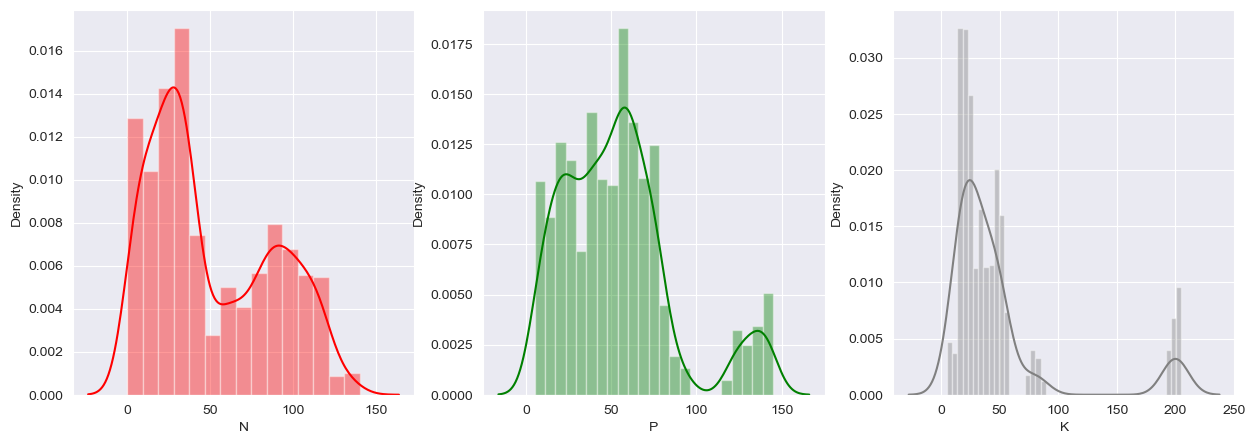

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.distplot(crop['N'],color='red')

plt.subplot(1,3,2)
sns.distplot(crop['P'],color='green')

plt.subplot(1,3,3)
sns.distplot(crop['K'],color='gray')

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='ph', ylabel='Density'>

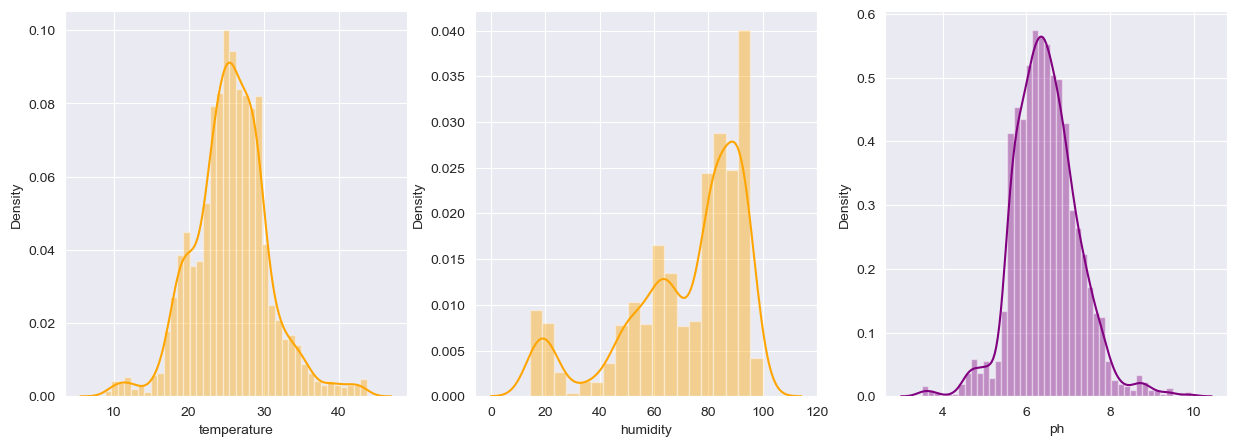

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.distplot(crop['temperature'],color='orange')

plt.subplot(1,3,2)
sns.distplot(crop['humidity'],color='orange')

plt.subplot(1,3,3)
sns.distplot(crop['ph'],color='purple')

C:\Users\tiwar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

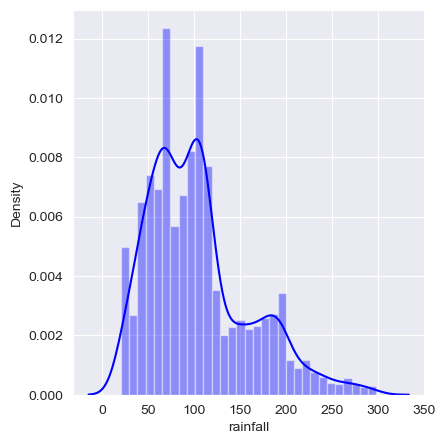

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(crop['rainfall'],color='blue')

In [13]:
#Checking the Statistics for all the crops
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(crop['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(crop['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(crop['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(crop['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(crop['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(crop['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(crop['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  50.55
Average Ratio of Phosphorous in the soil :  53.36
Average Ratio of Potassium in the soil :  48.15
Average temperature in Celsius :  25.62
Average Relative Humidity in % is :  71.48
Average pH value of the soil :  6.47
Average Rain fall in mm :  103.46


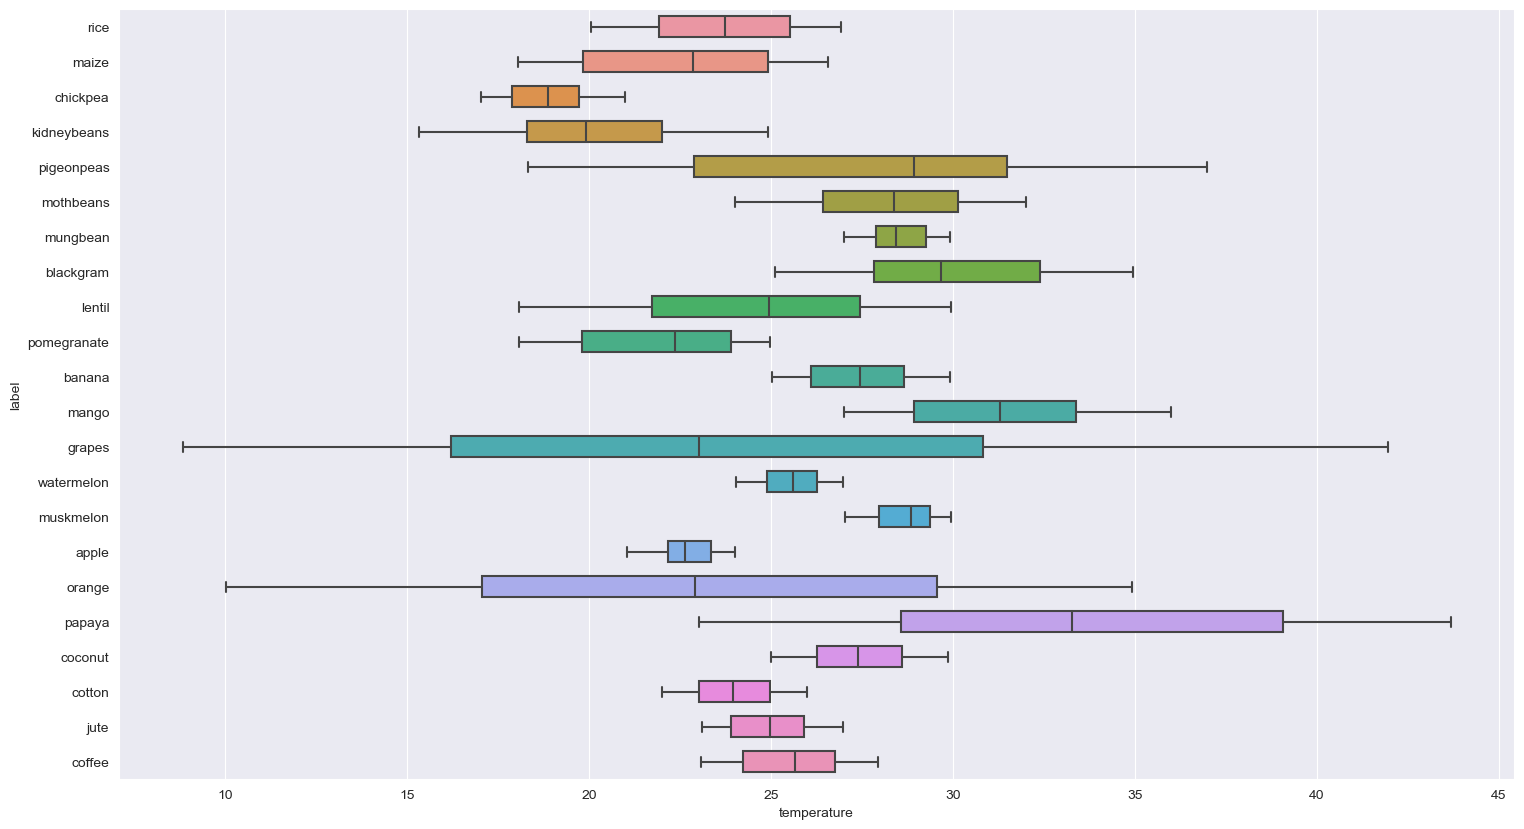

In [14]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=crop, width=.6 , orient="h")
plt.show()

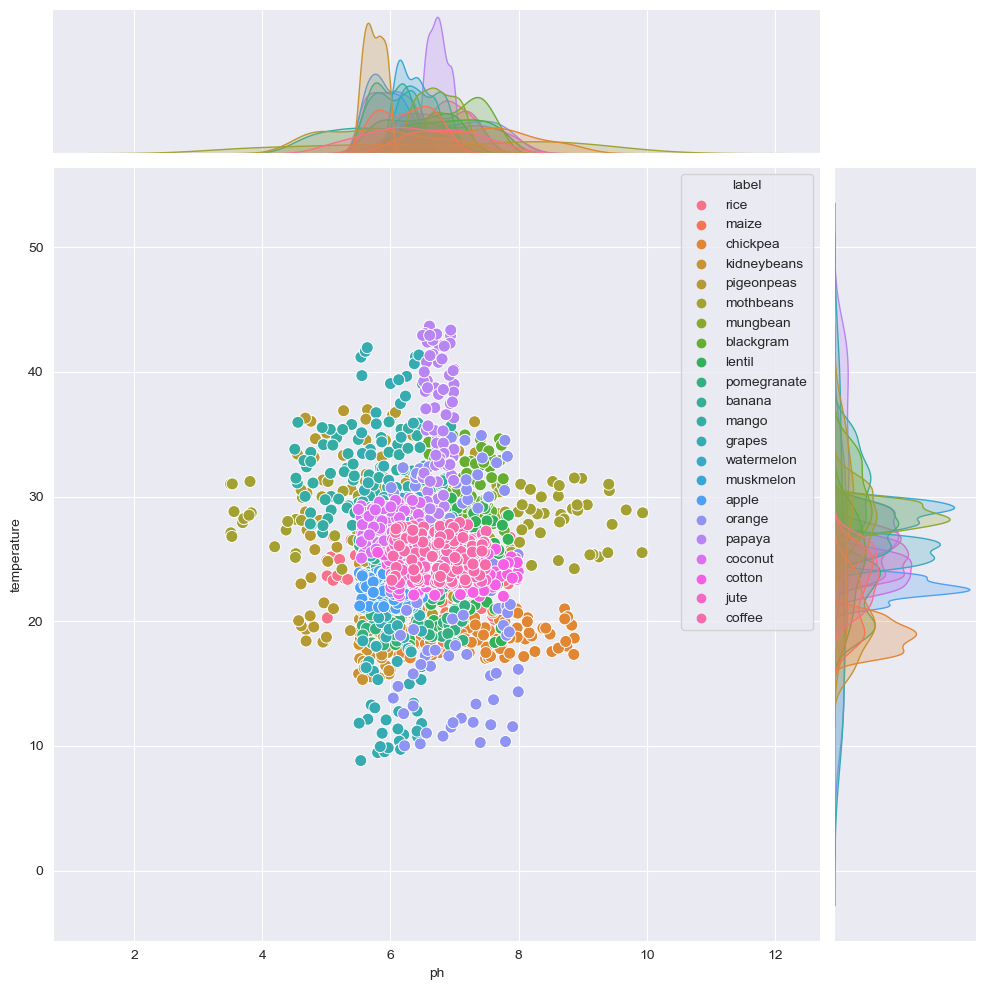

In [15]:
# In general, when the temperature rises above 21 pH decrease 
# The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant
sns.jointplot(data=crop, x="ph", y="temperature" ,height=10 ,hue="label" , space=0.1 ,s=75)
plt.show()

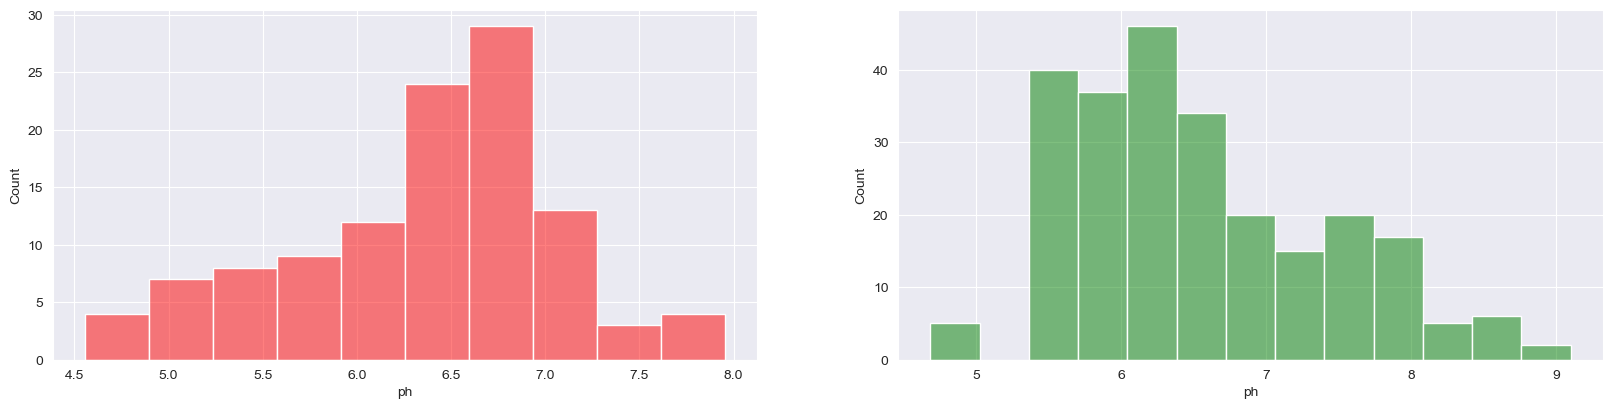

In [16]:
# pH decreases with increase in temperature.
Crop_high_Temperatures =crop.query("temperature > 34 ") 
Crop_low_Temperatures =crop.query("temperature < 19.5 ") 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(Crop_high_Temperatures.ph , binwidth=.34,color="red" ,alpha=0.5,)
plt.subplot(2,2,2)
sns.histplot(Crop_low_Temperatures.ph , binwidth=.34  ,color="green" ,alpha=0.5)
plt.show()

In [17]:
print( "Lowest pH value at low temperatures : " , Crop_low_Temperatures.ph.min())
print( "Lowest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.min())
print("- -- -- --- --- -- --- ")
print( "Highest pH value at low temperatures : " , Crop_low_Temperatures.ph.max())
print( "Highest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.max())
print("- -- -- --- --- -- --- ")
print( "Average pH value at low temperatures : " , Crop_low_Temperatures.ph.mean())
print( "Average pH value at Highest temperatures : " , Crop_high_Temperatures.ph.mean())

Lowest pH value at low temperatures :  4.681576043
Lowest pH value at Highest temperatures :  4.555688532
- -- -- --- --- -- --- 
Highest pH value at low temperatures :  8.868741443
Highest pH value at Highest temperatures :  7.786725333
- -- -- --- --- -- --- 
Average pH value at low temperatures :  6.540344889121458
Average pH value at Highest temperatures :  6.348908818991152


In [18]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season
print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] < 35)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['chickpea' 'kidneybeans' 'pigeonpeas']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


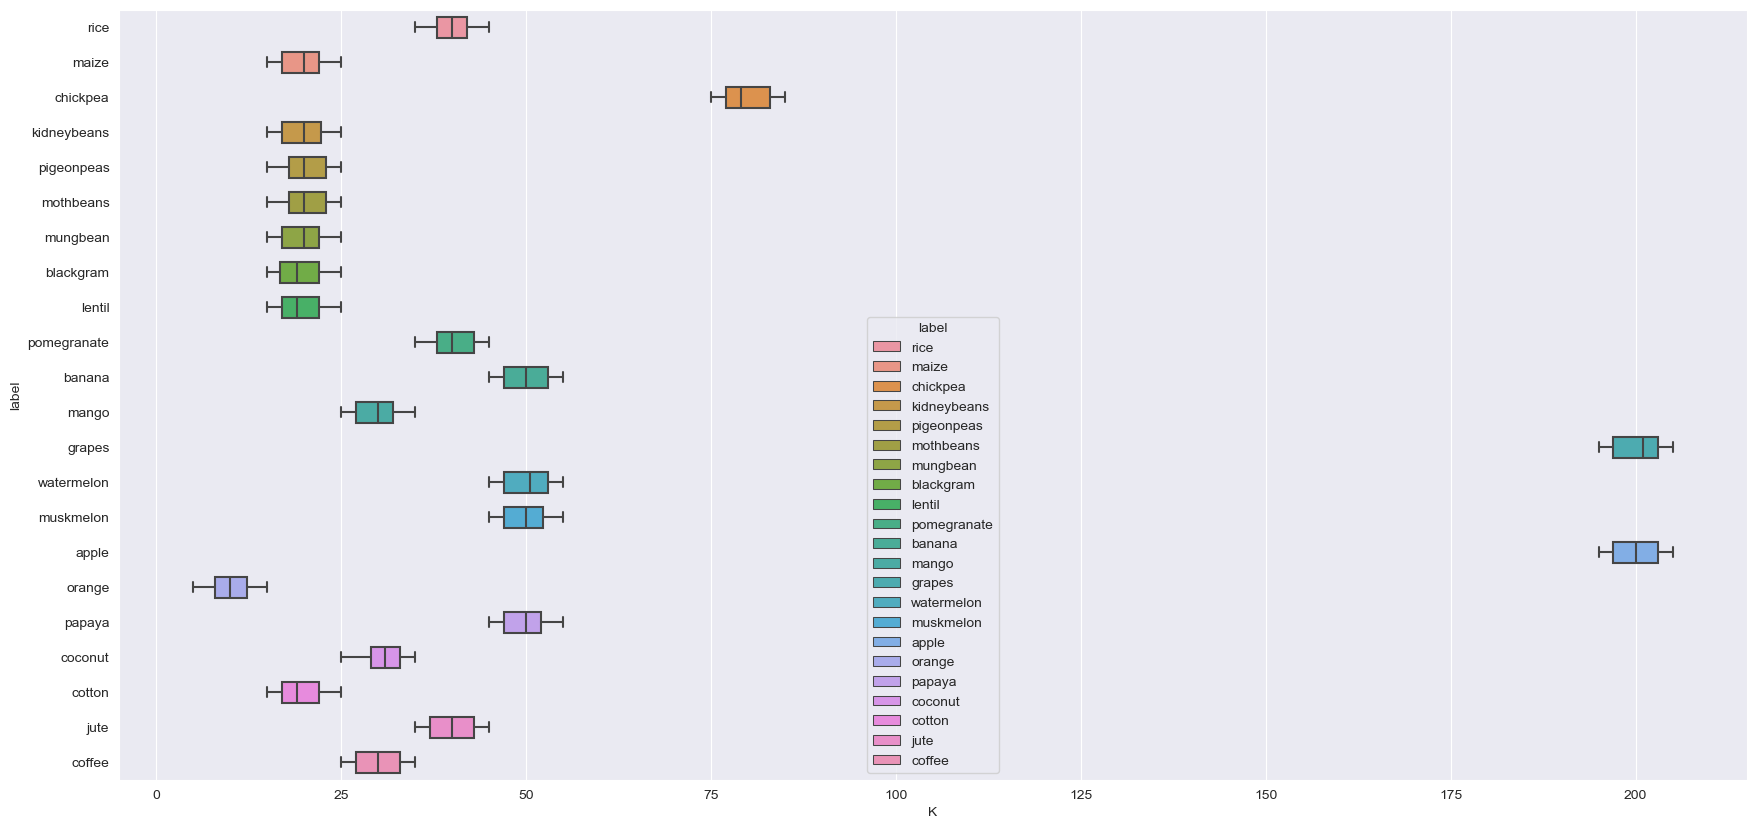

In [19]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
plt.figure(figsize=(21,10))
sns.boxplot(x="K", y="label", data=crop,
            whis=[0, 100], width=0.6
            , orient="h" ,  hue="label" , dodge=False)
plt.show()

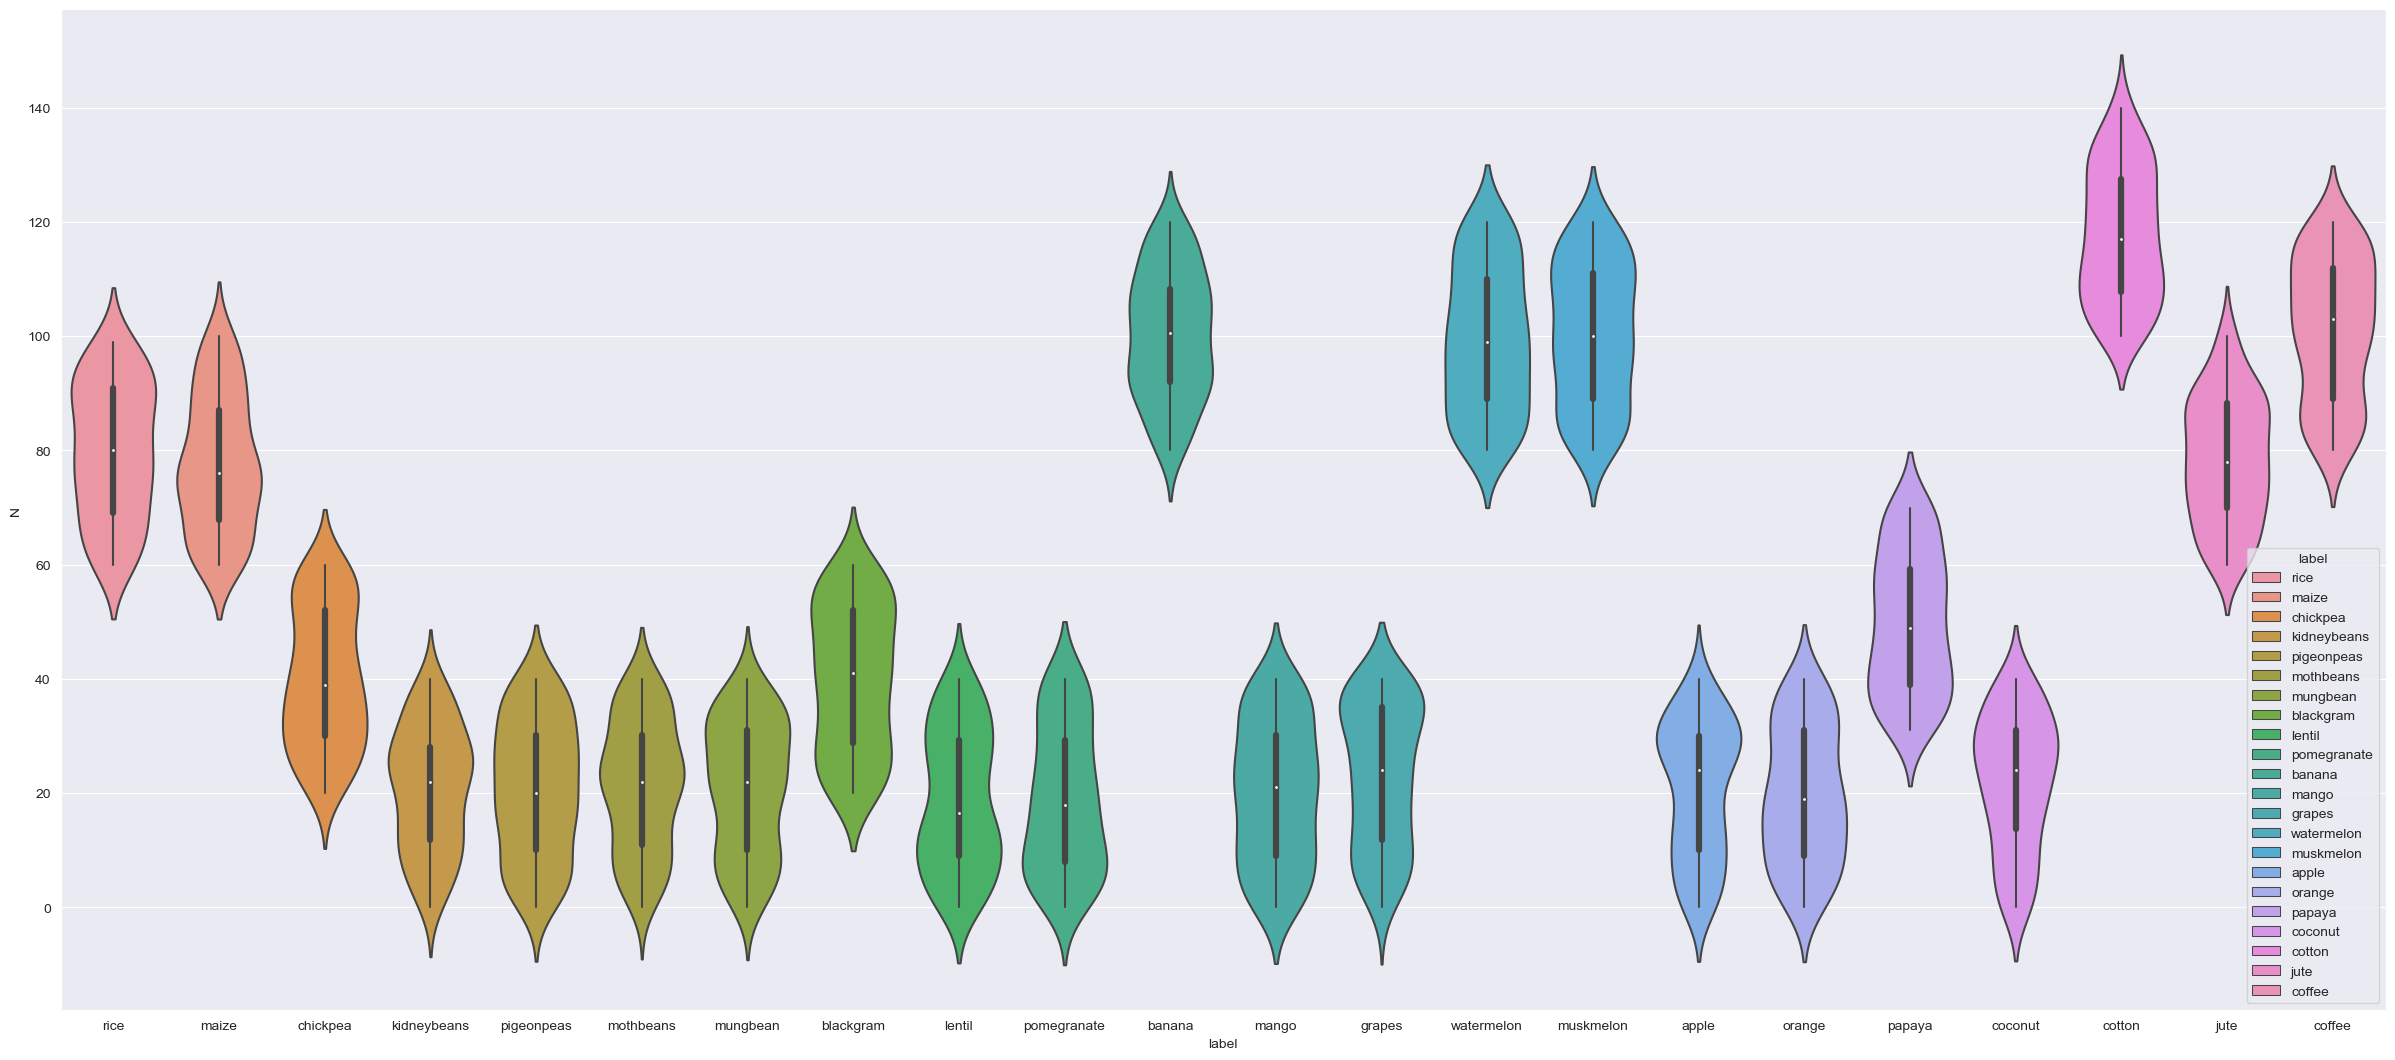

In [20]:
plt.figure(figsize=(30,13))
sns.violinplot(x="label", y="N", data=crop, hue="label" ,dodge=False)
plt.show()

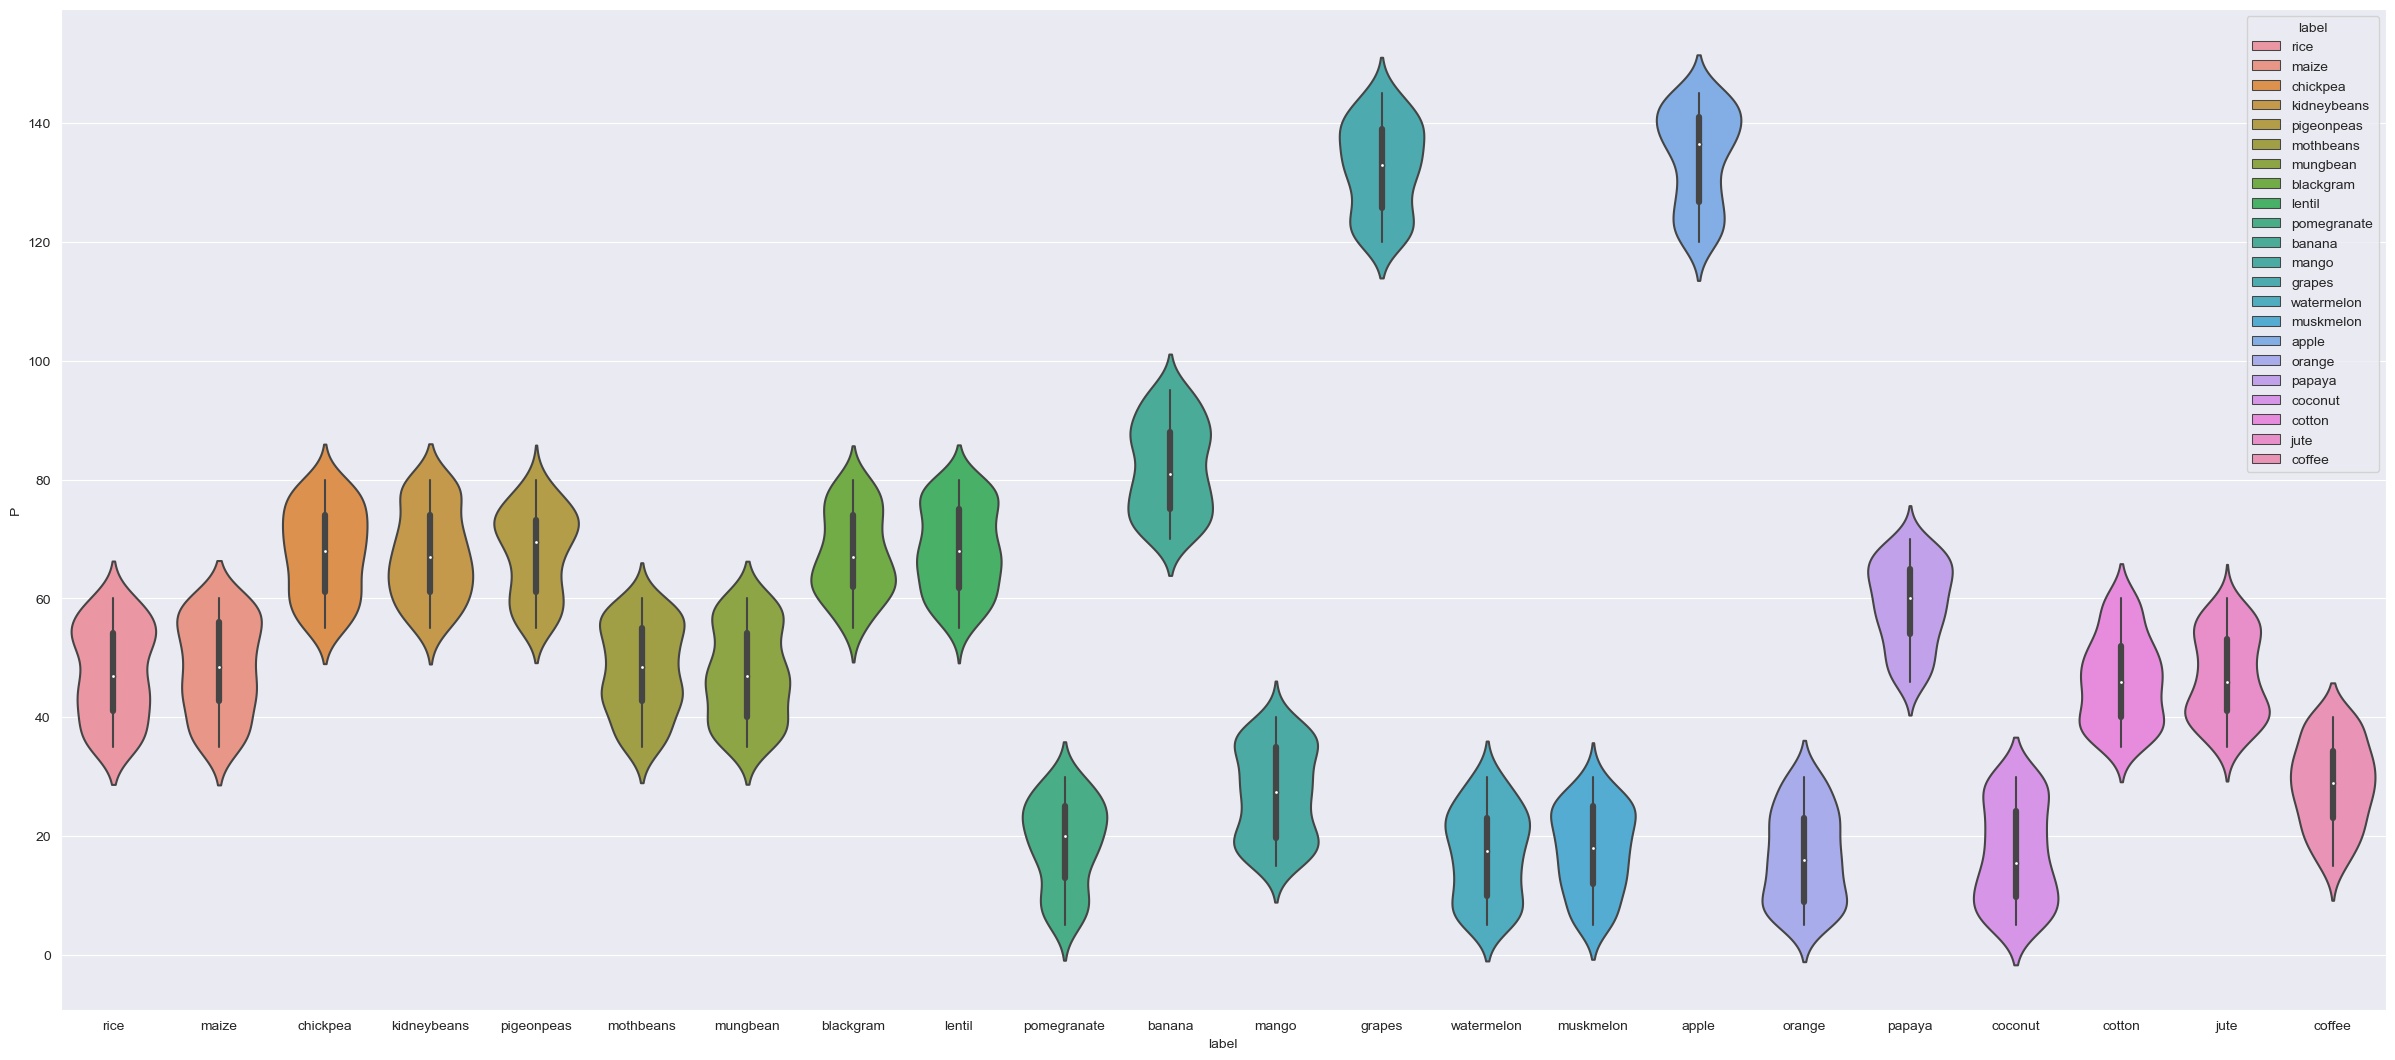

In [21]:
plt.figure(figsize=(30,13))
sns.violinplot(x="label", y="P", data=crop, hue="label" ,dodge=False)
plt.show()

## Correlation between different features

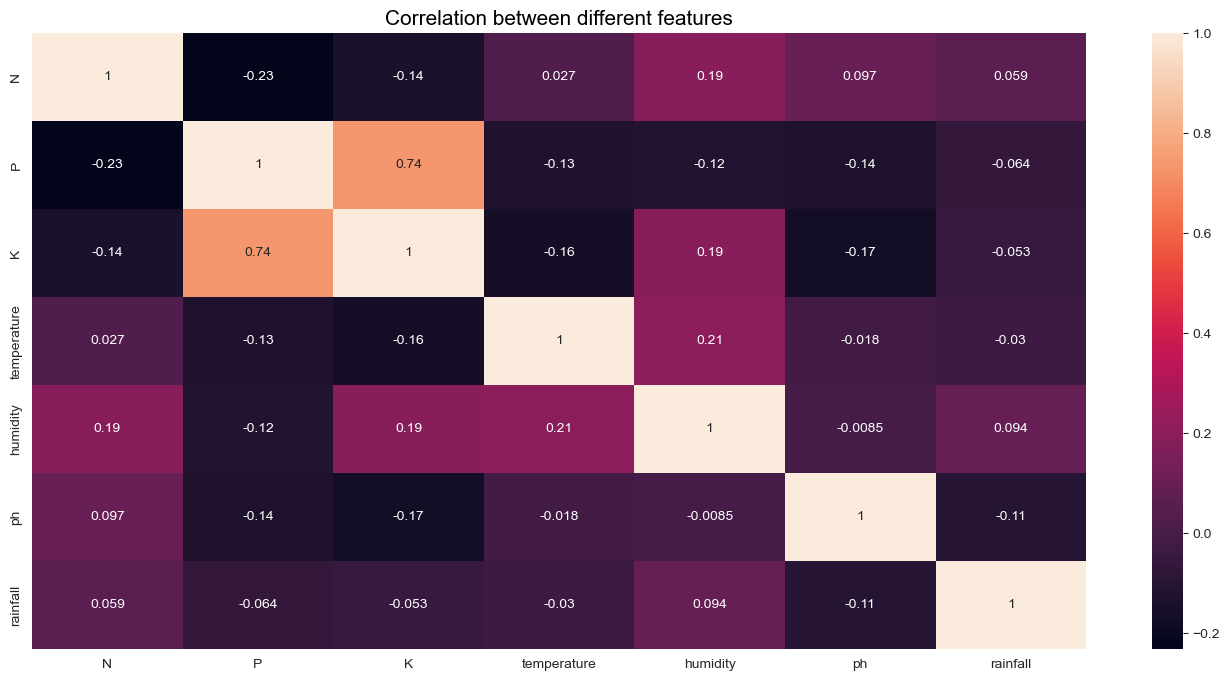

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(crop.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

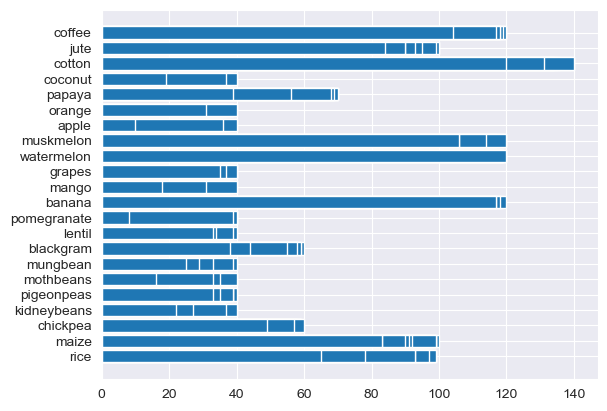

In [23]:
plt.barh(crop['label'], crop['N'])
plt.show()

In [24]:
# sns.pairplot(crop,hue="label")

In [49]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
crop['label']= label_encoder.fit_transform(crop['label'])
crop['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5], dtype=int64)

In [26]:
from sklearn import model_selection

X = crop.drop('label',axis=1)
Y = crop['label']

print(X.shape)
print(Y.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state = 0)
X_train.shape, X_test.shape, type(X_train)

(2200, 7)
(2200,)


((1650, 7), (550, 7), pandas.core.frame.DataFrame)

In [27]:
import time
print("Implementation of Guassian Naive Bayes \n")

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
  
clfg = GaussianNB()
start_timeGB = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_timeGB = time.time()
training_timeNB = end_timeGB - start_timeGB
print("Training time Gaussian Naive Bayes: ", training_timeNB)

# testing time ================================================================

start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
testing_timeNB = end_time-start_time
print("Testing time Gaussian Naive Bayes: ", testing_timeNB)

trainNB = clfg.score(X_train, y_train)
testNB = clfg.score(X_test, y_test)
print("Train score is:", round(trainNB,4))
print("Test score is:", round(testNB,4))

Implementation of Guassian Naive Bayes 

Training time Gaussian Naive Bayes:  0.0034017562866210938
Testing time Gaussian Naive Bayes:  0.0020024776458740234
Train score is: 0.9945
Test score is: 0.9945


In [28]:
import time
print("Implementation of KNN \n")

# Gaussian Naive Bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
  
KNN = KNeighborsClassifier()
start_timeGB = time.time()
KNN.fit(X_train, y_train.values.ravel())
end_timeGB = time.time()
training_timeNB = end_timeGB - start_timeGB
print("Training time Gaussian Naive Bayes: ", training_timeNB)

# testing time ================================================================

start_time = time.time()
y_test_pred = KNN.predict(X_test)
end_time = time.time()
testing_timeNB = end_time-start_time
print("Testing time Gaussian Naive Bayes: ", testing_timeNB)

trainKNN = clfg.score(X_train, y_train)
testKNN = clfg.score(X_test, y_test)
print("Train score is:", round(trainKNN,4))
print("Test score is:", round(testKNN,4))

Implementation of KNN 

Training time Gaussian Naive Bayes:  0.0021762847900390625
Testing time Gaussian Naive Bayes:  0.011362552642822266
Train score is: 0.9945
Test score is: 0.9945


C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
import time
print("Implementation of Bagging Classifier \n")

# Gaussian Naive Bayes
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
bclf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
  
bclf = KNeighborsClassifier()
start_timeGB = time.time()
bclf.fit(X_train, y_train.values.ravel())
end_timeGB = time.time()
training_timeNB = end_timeGB - start_timeGB
print("Training time Gaussian Naive Bayes: ", training_timeNB)

# testing time ================================================================

start_time = time.time()
y_test_pred = bclf.predict(X_test)
end_time = time.time()
testing_timeNB = end_time-start_time
print("Testing time Gaussian Naive Bayes: ", testing_timeNB)

trainBC = clfg.score(X_train, y_train)
testBC = clfg.score(X_test, y_test)
print("Train score is:", round(trainBC,4))
print("Test score is:", round(testBC,4))

Implementation of Bagging Classifier 

Training time Gaussian Naive Bayes:  0.0020275115966796875
Testing time Gaussian Naive Bayes:  0.01394796371459961
Train score is: 0.9945
Test score is: 0.9945


C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
#Code: Python implementation of Decision Tree
print("Implementation of Decision Tree\n")

# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier()
start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeDT = end_time-start_time
print("Training time Decision Tree: ", training_timeDT)

start_time = time.time()
y_test_pred = clfd.predict(X_test)
end_time = time.time()
testing_timeDT = end_time-start_time
print("Testing time Decision Tree: ", testing_timeDT)

trainDT = clfd.score(X_train, y_train)
testDT = clfd.score(X_test, y_test)
print("Train score is:", round(trainDT,4))
print("Test score is:", round(testDT,4))

Implementation of Decision Tree

Training time Decision Tree:  0.007206916809082031
Testing time Decision Tree:  0.0010149478912353516
Train score is: 1.0
Test score is: 0.9855


In [31]:
# Code: Python code implementation of Random Forest
print("Implementation of Random Forest\n")

from sklearn.ensemble import RandomForestClassifier
  
clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeRF = end_time-start_time
print("Training time Random Forest: ",training_timeRF)

y_test_pred = clfr.predict(X_test)
end_time = time.time()
testing_timeRF = end_time-start_time
print("Testing time Random Forest: ", testing_timeRF)

trainRF = clfr.score(X_train, y_train)
testRF = clfr.score(X_test, y_test)
print("Train score is:", round(trainRF,4))
print("Test score is:", round(testRF,4))

Implementation of Random Forest

Training time Random Forest:  0.05824875831604004
Testing time Random Forest:  0.06432890892028809
Train score is: 1.0
Test score is: 1.0


In [32]:
# Code: Python implementation of Support Vector Classifier
print("Implementation of SVC\n")

from sklearn.svm import SVC
  
clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeSVM = end_time-start_time
print("Training time Support Vector Classifier: ", training_timeSVM)

start_time = time.time()
y_test_pred = clfs.predict(X_test)
end_time = time.time()
testing_timeSVM = end_time-start_time
print("Testing time Support Vector Classifier: ", testing_timeSVM)

trainSVM = clfr.score(X_train, y_train)
testSVM = clfr.score(X_test, y_test)
print("Train score is:", round(trainSVM,4))
print("Test score is:", round(testSVM,4))

Implementation of SVC

Training time Support Vector Classifier:  0.025597810745239258
Testing time Support Vector Classifier:  0.045519351959228516
Train score is: 1.0
Test score is: 1.0


In [33]:
#Code: Python implementation of Logistic Regression
print("Implementation of Logistics Regression\n")

from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression()
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeLR = end_time-start_time
print("Training time Logistic Regression: ", training_timeLR)


start_time = time.time()
y_test_pred = clfl.predict(X_test)
end_time = time.time()
testing_timeLR = end_time-start_time
print("Testing time Logistic Regression: ", testing_timeLR)

trainLR = clfr.score(X_train, y_train)
testLR = clfr.score(X_test, y_test)
print("Train score is:", round(trainLR,4))
print("Test score is:", round(testLR,4))

Implementation of Logistics Regression

Training time Logistic Regression:  0.09035253524780273
Testing time Logistic Regression:  0.0020017623901367188
Train score is: 1.0
Test score is: 1.0


C:\Users\tiwar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#Code: Python implementation of Gradient Descent
print("Implementation of Gradient Descent\n")
 
from sklearn.ensemble import GradientBoostingClassifier
  
clfg = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
training_timeGB = end_time-start_time
print("Training time Gradient Descent: ", training_timeGB)

start_time = time.time()
y_test_pred = clfg.predict(X_test)
end_time = time.time()
testing_timeGB = end_time-start_time
print("Testing time Gradient Descent: ", testing_timeGB)

trainGB = clfr.score(X_train, y_train)
testGB = clfr.score(X_test, y_test)
print("Train score is:", round(trainGB,4))
print("Test score is:", round(testGB,4))

Implementation of Gradient Descent

Training time Gradient Descent:  5.507601737976074
Testing time Gradient Descent:  0.017506837844848633
Train score is: 1.0
Test score is: 1.0


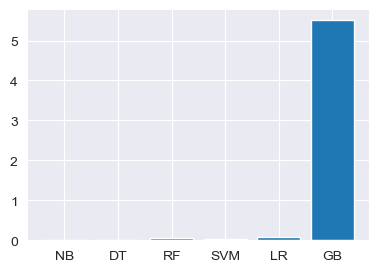

In [35]:
# Code: Analyse the training time of each model.

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [training_timeNB, training_timeDT, training_timeRF, training_timeSVM, training_timeLR, training_timeGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
plt.show()

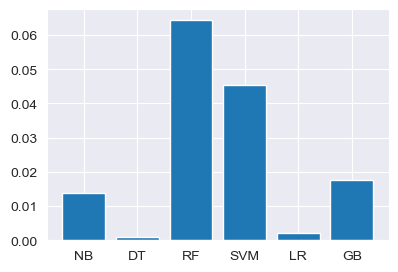

In [36]:
# Code: Analyse the testing time of each model.

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [testing_timeNB, testing_timeDT, testing_timeRF, testing_timeSVM, testing_timeLR, testing_timeGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
plt.show()

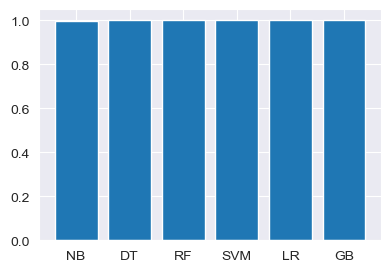

In [37]:
# Code: Analyse the training score of each model.


names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [trainNB, trainDT, trainRF, trainSVM, trainLR, trainGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
plt.show()

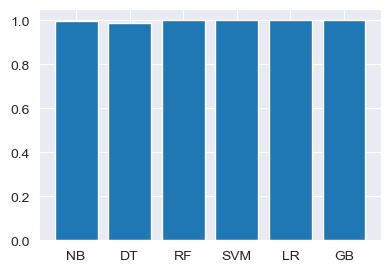

In [38]:
# Code: Analyse the test score of each model.

names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [testNB, testDT, testRF, testSVM, testLR, testGB]
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values) 
plt.show()

In [39]:
import pickle

# Serialize and save the model to a file
with open('Randomforest.pkl', 'wb') as file:
    pickle.dump(clfr, file)

In [42]:
pickle.dump(crop1,open('dataset1.pkl','wb'))

In [55]:
crop1.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [54]:
'crop.label.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5], dtype=int64)